<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/Customer_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer analisis

## About the Dataset

### Context and Problem Statement

Customer Personality Analysis is a detailed examination of a company's ideal customers. It helps businesses gain a deeper understanding of their customers and enables them to tailor products to meet the specific needs, behaviors, and concerns of different customer segments.

This analysis allows businesses to adjust their products based on their target customers from different segments. For instance, instead of spending resources marketing a new product to every customer in the company's database, the company can identify which customer segment is most likely to buy the product and focus marketing efforts solely on that segment.

### Content
#### Attributes

**People**

- **ID**: Customer's unique identifier.
- **Year_Birth**: Customer's birth year.
- **Education**: Customer's education level.
- **Marital_Status**: Customer's marital status.
- **Income**: Customer's annual household income.
- **Kidhome**: Number of children in the customer's household.
- **Teenhome**: Number of teenagers in the customer's household.
- **Dt_Customer**: Date the customer enrolled with the company.
- **Recency**: Number of days since the customer's last purchase.
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.

**Products**

- **MntWines**: Amount spent on wine in the last 2 years.
- **MntFruits**: Amount spent on fruits in the last 2 years.
- **MntMeatProducts**: Amount spent on meat in the last 2 years.
- **MntFishProducts**: Amount spent on fish in the last 2 years.
- **MntSweetProducts**: Amount spent on sweets in the last 2 years.
- **MntGoldProds**: Amount spent on gold products in the last 2 years.

**Promotions**

- **NumDealsPurchases**: Number of purchases made with a discount.
- **AcceptedCmp1**: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise.
- **AcceptedCmp2**: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise.
- **AcceptedCmp3**: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise.
- **AcceptedCmp4**: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise.
- **AcceptedCmp5**: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise.
- **Response**: 1 if the customer accepted the offer in the last campaign, 0 otherwise.

**Place**

- **NumWebPurchases**: Number of purchases made through the company's website.
- **NumCatalogPurchases**: Number of purchases made using a catalog.
- **NumStorePurchases**: Number of purchases made directly in stores.
- **NumWebVisitsMonth**: Number of visits to the company's website in the last month.

### Target
The goal is to perform clustering to summarize customer segments.

### Acknowledgement
The dataset for this project was provided by Dr. Omar Romero-Hernandez.

source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

inspiration: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering

In [ ]:
import pandas as pd
import numpy as np
### las protagonistas ###
import plotly.express as px
import plotly.graph_objects as go
##################################
import plotly.io as pio
from matplotlib.colors import ListedColormap
import sys
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
# pio.renderers.default = "browser" utilizar el renderizador web

In [ ]:
# import the data
url = "https://raw.githubusercontent.com/DavidSilveraGabriel/Customer-Personality-Analysis/main/data/marketing_campaign.csv"
df = pd.read_csv(url, sep="\t") # \t due to the kind of separation
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data = df.copy().dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
data.Dt_Customer

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
...,...
2235,13-06-2013
2236,10-06-2014
2237,25-01-2014
2238,24-01-2014


In [ ]:
# Asegúrate de que "Dt_Customer" se convierte usando .loc[] para evitar el warning
data.loc[:, "Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")

# Calcula los días como antes
dates = [i.date() for i in data["Dt_Customer"]]

# Fechas del cliente más reciente y más antiguo
d1 = max(dates)  # Cliente más reciente
days = [(d1 - i).days for i in dates]  # Diferencia en días

# Utiliza .loc[] al crear la nueva column
data.loc[:, "Customer_For"] = pd.to_numeric(days, errors="coerce")

In [ ]:
# Feature Engineering
# Age of customer today
data.loc[:, "Age"] = 2021 - data["Year_Birth"]

# Total spendings on various items
data.loc[:, "Spent"] = (data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] +
                        data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"])

# Deriving living situation by marital status "Alone"
data.loc[:, "Living_With"] = data["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone"
})

# Feature indicating total children living in the household
data.loc[:, "Children"] = data["Kidhome"] + data["Teenhome"]

# Feature for total members in the household
data.loc[:, "Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

# Feature pertaining to parenthood
data.loc[:, "Is_Parent"] = np.where(data["Children"] > 0, 1, 0)

# Segmenting education levels into three groups
data.loc[:, "Education"] = data["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})

# For clarity
data = data.rename(columns={
    "MntWines": "Wines",
    "MntFruits": "Fruits",
    "MntMeatProducts": "Meat",
    "MntFishProducts": "Fish",
    "MntSweetProducts": "Sweets",
    "MntGoldProds": "Gold"
})

# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312,56,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,139,37,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,161,40,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,381,54,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,19,75,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,155,40,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,156,65,843,Partner,1,3,1


In [ ]:
#correlation matrix
colums=["Age","Income","Spent","Children","Family_Size","Is_Parent"]
corrmat= data[colums].corr()

fig = px.imshow(corrmat,
                text_auto=".2f",
                template="plotly_dark",
                labels=dict(x="X", y="Y", color="Correlation"),
                title="Correlation Matrix"
                )
fig.update_traces(textfont=dict(size=12))
#fig.update_layout(title="Correlation Matrix")
fig.show()

In [ ]:
fig = px.scatter(data, x="Income", y="Spent")

fig.show()

In [ ]:
fig = px.violin(data,x="Education",y="Income",color="Education",template="plotly_dark")
fig.show()

In [ ]:
fig = px.box(data,x="Education",y="Income",color="Education",template="plotly_dark",)
fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [ ]:
fig = px.scatter(data, x="Income", y="Age", title='edad vs ingresos')
fig.show()

In [ ]:
fig = px.scatter(data,x="Income",y="Wines",color="Teenhome",title="Compra de vino diferenciado por si hay adolecentes")
fig.show()

# Post procesamiento y aplicacion de clustering

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.894187,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,2.504712,-0.554143,0.693232,1.529129,0.986443,1.675488,-1.348829,-1.264803,-1.758673,-1.581389
1,-0.894187,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,-0.571082,-1.169518,-0.131574,-1.188411,1.236801,-0.962358,-1.348829,1.405806,0.450009,0.632356
2,-0.894187,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,-0.229327,1.291982,-0.543978,-0.205155,0.318822,0.280250,0.741384,-1.264803,-0.654332,-1.581389
3,-0.894187,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,-0.912837,-0.554143,0.280829,-1.059945,-1.266777,-0.919224,0.741384,0.070501,0.450009,0.632356
4,0.569268,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0.112428,0.061232,-0.131574,-0.951244,-1.016420,-0.307044,0.741384,0.070501,0.450009,0.632356


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,-1.282568e-17,2.850029,-5.881402,-2.489399,-0.795923,2.428345,7.390968
col2,2216.0,1.282568e-17,1.701845,-4.170004,-1.317400,-0.186329,1.232936,6.140545
col3,2216.0,-1.082167e-17,1.228074,-5.010770,-0.846565,-0.048796,0.865922,6.716866


In [ ]:
# Asumiendo que PCA_ds es un DataFrame de pandas
PCA_ds.head()

,col1,col2,col3
0,5.019429,-0.083817,2.408236
1,-2.894196,-0.053673,-1.486394
2,2.578439,-0.728812,-0.248459
3,-2.586061,-1.441621,-0.392000
4,-0.685784,0.176334,-0.131087


In [ ]:
import plotly.graph_objects as go

# Crear el objeto Figure
fig = go.Figure(data=[go.Scatter3d(
    x=PCA_ds["col1"],
    y=PCA_ds["col2"],
    z=PCA_ds["col3"],
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        opacity=0.5
    )
)])

# Configurar el diseño
fig.update_layout(
    title="A 3D Projection Of Data In The Reduced Dimension",
    scene=dict(
        xaxis_title="col1",
        yaxis_title="col2",
        zaxis_title="col3"
    ),
    width=1000,
    height=800
)

# Mostrar el gráfico
fig.show()

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

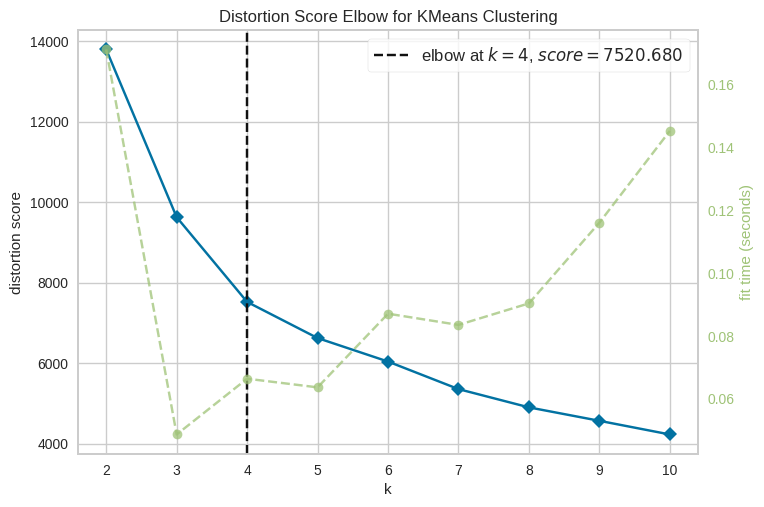

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

In [ ]:
# Crear una paleta de colores similar a cmap en matplotlib
colors = px.colors.qualitative.Set1  # Puedes cambiar Set1 por otra paleta si lo prefieres

# Crear el objeto Figure
fig = go.Figure() # crear el lienzo

# Añadir los puntos para cada cluster
for cluster in PCA_ds["Clusters"].unique():
    cluster_data = PCA_ds[PCA_ds["Clusters"] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data["col1"],
        y=cluster_data["col2"],
        z=cluster_data["col3"],
        mode='markers',
        marker=dict(
            size=5,
            color=colors[cluster],  # Asignar un color de la paleta a cada cluster
            opacity=0.5
        ),
        name=f'Cluster {cluster}'  # Esto creará una leyenda para cada cluster
    ))

# Configurar el diseño
fig.update_layout(
    title="The Plot Of The Clusters",
    scene=dict(
        xaxis_title="col1",
        yaxis_title="col2",
        zaxis_title="col3"
    ),
    width=1000,
    height=800,
    legend_title="Clusters"
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Contar la frecuencia de cada cluster
cluster_counts = data['Clusters'].value_counts().sort_index()

# Definir la paleta de colores
color_palette = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Crear el gráfico de barras
fig = go.Figure(data=[go.Bar(
    x=cluster_counts.index,
    y=cluster_counts.values,
    marker_color=color_palette
)])

# Actualizar el diseño
fig.update_layout(
    title="Distribution Of The Clusters",
    xaxis_title="Clusters",
    yaxis_title="Count",
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),  # Asegura que todos los clusters se muestren en el eje x
    bargap=0.2,  # Ajusta el espacio entre las barras
    width=800,   # Ancho de la figura
    height=500   # Altura de la figura
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Definir la paleta de colores
color_palette = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Crear el objeto Figure
fig = go.Figure()

# Añadir los puntos para cada cluster
for cluster in data["Clusters"].unique():
    cluster_data = data[data["Clusters"] == cluster]
    fig.add_trace(go.Scatter(
        x=cluster_data["Spent"],
        y=cluster_data["Income"],
        mode='markers',
        marker=dict(
            size=8,
            color=color_palette[cluster],
            opacity=0.8
        ),
        name=f'Cluster {cluster}'
    ))

# Configurar el diseño
fig.update_layout(
    title="Cluster's Profile Based On Income And Spending",
    xaxis_title="Spent",
    yaxis_title="Income",
    legend_title="Clusters",
    width=800,
    height=600
)

# Mostrar el gráfico
fig.show()

In [ ]:
# Crear la columna Total_Promos
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

# Definir la paleta de colores
color_palette = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

# Crear el objeto Figure
fig = go.Figure()

# Añadir las barras para cada cluster
for cluster in data["Clusters"].unique():
    cluster_data = data[data["Clusters"] == cluster]
    counts = cluster_data["Total_Promos"].value_counts().sort_index()
    fig.add_trace(go.Bar(
        x=counts.index,
        y=counts.values,
        name=f'Cluster {cluster}',
        marker_color=color_palette[cluster]
    ))

# Configurar el diseño
fig.update_layout(
    title="Count Of Promotion Accepted",
    xaxis_title="Number Of Total Accepted Promotions",
    yaxis_title="Count",
    barmode='group',
    legend_title="Clusters",
    width=900,
    height=600
)

# Asegurar que el eje x muestre todos los valores posibles de Total_Promos
fig.update_xaxes(range=[-0.5, data["Total_Promos"].max() + 0.5], dtick=1)

# Mostrar el gráfico
fig.show()

### Argumentos comunes en Plotly Express

1. **`data_frame`**: El dataframe o tabla que contiene los datos.
   - Ejemplo: `data_frame=df`
   
2. **`x`**: Columna a utilizar para el eje X.
   - Ejemplo: `x="column_name"`

3. **`y`**: Columna a utilizar para el eje Y.
   - Ejemplo: `y="column_name"`

4. **`z`**: Columna a utilizar para el eje Z en gráficos 3D.
   - Ejemplo: `z="column_name"`

5. **`color`**: Columna para mapear colores.
   - Ejemplo: `color="category_column"`

6. **`size`**: Columna que define el tamaño de los puntos en gráficos como scatter plots.
   - Ejemplo: `size="size_column"`

7. **`symbol`**: Columna que define símbolos en gráficos como scatter plots.
   - Ejemplo: `symbol="category_column"`

8. **`facet_row`**: Columna para crear subgráficos por fila.
   - Ejemplo: `facet_row="category_column"`

9. **`facet_col`**: Columna para crear subgráficos por columna.
   - Ejemplo: `facet_col="category_column"`

10. **`facet_col_wrap`**: Número máximo de subgráficos por fila cuando se usa `facet_col`.
    - Ejemplo: `facet_col_wrap=3`

11. **`hover_name`**: Columna cuyos valores aparecerán como etiquetas en los puntos al pasar el cursor.
    - Ejemplo: `hover_name="name_column"`

12. **`hover_data`**: Columnas adicionales para mostrar información al pasar el cursor.
    - Ejemplo: `hover_data=["col1", "col2"]`

13. **`text`**: Columna cuyos valores se mostrarán como texto en los puntos.
    - Ejemplo: `text="label_column"`

14. **`animation_frame`**: Columna que define los cuadros de animación (utilizada en gráficos animados).
    - Ejemplo: `animation_frame="year"`

15. **`animation_group`**: Columna que agrupa los puntos en la animación.
    - Ejemplo: `animation_group="country"`

16. **`line_group`**: Columna que agrupa puntos para trazar líneas entre ellos.
    - Ejemplo: `line_group="category_column"`

17. **`line_shape`**: Tipo de forma para las líneas (`"linear"`, `"spline"`, `"vhv"`, etc.).
    - Ejemplo: `line_shape="spline"`

18. **`range_x`**: Rango de valores del eje X.
    - Ejemplo: `range_x=[0, 100]`

19. **`range_y`**: Rango de valores del eje Y.
    - Ejemplo: `range_y=[0, 500]`

20. **`title`**: Título del gráfico.
    - Ejemplo: `title="My Plot Title"`

21. **`labels`**: Diccionario para renombrar ejes.
    - Ejemplo: `labels={"column_name": "New Label"}`

22. **`color_discrete_map`**: Diccionario para definir colores específicos para valores discretos.
    - Ejemplo: `color_discrete_map={"category1": "blue", "category2": "red"}`

23. **`color_continuous_scale`**: Escala de colores para valores continuos.
    - Ejemplo: `color_continuous_scale="Viridis"`

24. **`template`**: Plantilla para el diseño del gráfico (`"plotly"`, `"ggplot2"`, `"seaborn"`, etc.).
    - Ejemplo: `template="plotly_dark"`

25. **`log_x`**: Escala logarítmica para el eje X.
    - Ejemplo: `log_x=True`

26. **`log_y`**: Escala logarítmica para el eje Y.
    - Ejemplo: `log_y=True`

27. **`marginal_x`**: Tipo de gráfico marginal en el eje X (`"histogram"`, `"rug"`, `"violin"`, etc.).
    - Ejemplo: `marginal_x="histogram"`

28. **`marginal_y`**: Tipo de gráfico marginal en el eje Y.
    - Ejemplo: `marginal_y="violin"`

29. **`opacity`**: Opacidad de los puntos.
    - Ejemplo: `opacity=0.7`

30. **`category_orders`**: Orden personalizado para las categorías en el gráfico.
    - Ejemplo: `category_orders={"category_column": ["A", "B", "C"]}`

### Otras configuraciones:

- **`width` y `height`**: Dimensiones del gráfico.
  - Ejemplo: `width=800`, `height=600`

- **`symbol_sequence`**: Secuencia de símbolos a usar para categorías.
  - Ejemplo: `symbol_sequence=["circle", "square", "diamond"]`